# Mask R-CNN - Train FCN using MRCNN in Predict Mode 

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
# import matplotlib as plt
import mrcnn.utils     as utils
import mrcnn.visualize as visualize

from mrcnn.prep_notebook import build_fcn_training_pipeline, run_fcn_training_pipeline
from mrcnn.visualize     import display_training_batch
from mrcnn.prep_notebook import get_inference_batch, get_image_batch
# from mrcnn.visualize import (plot_3d_heatmap, plot_2d_heatmap, plot_2d_heatmap_compare, plot_3d_heatmap_compare,
#                             display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, display_heatmaps_mrcnn_fcn)
                             
# WEIGHT_FILE = 'F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_0900.h5'

input_parms = " --epochs         2   --steps_in_epoch 32  --last_epoch 0 "
input_parms +=" --batch_size     1   --lr 0.00001         --val_steps 8 " 
input_parms +=" --mrcnn_logs_dir train_mrcnn_coco "
input_parms +=" --fcn_logs_dir   train_fcn8_subset " 
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      init "
input_parms +=" --opt            adam "
input_parms +=" --fcn_arch       fcn8 " 
input_parms +=" --fcn_layers     all " 
input_parms +=" --sysout         screen "
## input_parms +=" --coco_classes   62 63 67 78 79 80 81 82 72 73 74 75 76 77"
input_parms +=" --coco_classes   78 79 80 81 82 44 46 47 48 49 50 51 34 35 36 37 38 39 40 41 42 43"
input_parms +=" --new_log_folder    "
parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())
print(args)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working dir:  E:\git_projs\MRCNN3\notebooks
Namespace(batch_size='1', coco_classes=[62, 63, 67, 78, 79, 80, 81, 82, 72, 73, 74, 75, 76, 77], epochs='2', fcn_arch='FCN8', fcn_layers=['all'], fcn_logs_dir='train_fcn8_subset', fcn_model='init', last_epoch='0', lr='0.00001', mrcnn_exclude_layers=None, mrcnn_logs_dir='train_mrcnn_coco', mrcnn_model='last', new_log_folder=True, opt='ADAM', steps_in_epoch='32', sysout='SCREEN', val_steps='8')


In [5]:
# mrcnn_model, fcn_model = build_traininf_pipeline(fcn_weight_file = WEIGHT_FILE, batch_size = 2)
mrcnn_model, fcn_model = build_fcn_training_pipeline(args = args)


--> Execution started at: 11-28-2018 @ 11:42:34
    Tensorflow Version: 1.8.0   Keras Version : 2.2.0 
    MRCNN Model        :  last
    FCN Model          :  init
    MRCNN Log Dir      :  train_mrcnn_coco
    FCN Log Dir        :  train_fcn8_subset
    FCN Arch           :  FCN8
    FCN Log Dir        :  ['all']
    Last Epoch         :  0
    Epochs to run      :  2
    Steps in each epoch:  32
    Validation steps   :  8
    Batch Size         :  1
    Optimizer          :  ADAM
    sysout             :  SCREEN
>>> Initialize Paths
 windows  Windows

Paths:
-------------------------
COCO_DATASET_PATH              F:\MLDatasets\coco2014
COCO_HEATMAP_PATH              F:\MLDatasets\coco2014_heatmaps
COCO_MODEL_PATH                F:\PretrainedModels\mask_rcnn_coco.h5
DIR_DATASET                    F:\MLDatasets
DIR_PRETRAINED                 F:\PretrainedModels
DIR_ROOT                       F:\
DIR_TRAINING                   F:\models
FCN_TRAINING_PATH              F:\models\train

    >> input to MVN.PROB: pos_grid (meshgrid) shape:  (256, 256, ?, 2)
     Prob_grid shape from mvn.probe:  (256, 256, ?)
     Prob_grid shape after tanspose:  (?, 256, 256)
    << output probabilities shape  :  (?, 256, 256)
    prob_grid_clipped :  (?, 256, 256)

    normalization ------------------------------------------------------
    normalizer     :  (?, 1, 1)
    prob_grid_cns: clipped/normed/scaled :  (?, 256, 256)
    alt_scores_1    :  (None, 5)  Keras tensor  False

    Scatter out the probability distributions based on class --------------
    pt2_ind shape      :  (?, 3)
    prob_grid_clippped :  (?, 256, 256)
    gauss_heatmap      :  (1, 81, 200, 256, 256)

    Reduce SUM based on class and normalize within each class -------------------------------------
    gaussian_heatmap_sum :  (1, 81, 256, 256) Keras tensor  False
    normalizer shape   :  (1, 81, 1, 1)
    normalized heatmap :  (1, 81, 256, 256)  Keras tensor  False
    reshaped heatmap               :  (1, 256

   FCN Block 12 shape is               :  (None, 256, 256, 64)
   FCN Block 13 (Max pooling) shape is :  (None, 128, 128, 64)
   FCN Block 21 shape is               :  (?, 128, 128, 128)
   FCN Block 22 shape is               :  (None, 128, 128, 128)
   FCN Block 23 (Max pooling) shape is :  (None, 64, 64, 128)
   FCN Block 31 shape is               :  (None, 64, 64, 256)
   FCN Block 32 shape is               :  (None, 64, 64, 256)
   FCN Block 33 shape is               :  (None, 64, 64, 256)
   FCN Block 34 (Max pooling) shape is :  (?, 32, 32, 256)
   FCN Block 41 shape is               :  (None, 32, 32, 512)
   FCN Block 42 shape is               :  (None, 32, 32, 512)
   FCN Block 43 shape is               :  (None, 32, 32, 512)
   FCN Block 44 (Max pooling) shape is :  (?, 16, 16, 512)
   FCN Block 51 shape is               :  (None, 16, 16, 512)
   FCN Block 52 shape is               :  (None, 16, 16, 512)
   FCN Block 53 shape is               :  (None, 16, 16, 512)
   FCN Bloc

    loss final        : (1, 1) (1, 1) KerasTensor:  False
 self.keras_model.losses :  0

>>> FCN build complete. mode:  training
>>> FCN initialization complete. mode:  training

Paths:
-------------------------
COCO_DATASET_PATH              F:\MLDatasets\coco2014
COCO_HEATMAP_PATH              F:\MLDatasets\coco2014_heatmaps
COCO_MODEL_PATH                F:\PretrainedModels\mask_rcnn_coco.h5
DIR_DATASET                    F:\MLDatasets
DIR_PRETRAINED                 F:\PretrainedModels
DIR_ROOT                       F:\
DIR_TRAINING                   F:\models
FCN_TRAINING_PATH              F:\models\train_fcn8_subset
FCN_VGG16_MODEL_PATH           F:\PretrainedModels\fcn_vgg16_weights_tf_dim_ordering_tf_kernels.h5
MRCNN_TRAINING_PATH            F:\models\train_mrcnn_coco
RESNET_MODEL_PATH              F:\PretrainedModels\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
VGG16_MODEL_PATH               F:\PretrainedModels\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5



Config

## Defined training datasets

In [8]:
##------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets
##------------------------------------------------------------------------------------
from mrcnn.coco import prep_coco_dataset
# chair/cound/dining tbl/ electronics/ appliances -- train: 34562  val: 1489
furn_elect_appl = [62, 63, 67, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]  
## appliances / kitchen / sports                  -- train: 46891  val: 1954
appl_ktch_sports = [78, 79, 80, 81, 82,44, 46, 47, 48, 49, 50, 51,34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

print('ARG: load coco classes: ', args.coco_classes)
load_class_ids = appl_ktch_sports
# load_class_ids = args.coco_classes
print('load coco classes: ', load_class_ids)

dataset_train = prep_coco_dataset(["train", "val35k"], mrcnn_model.config, generator = False , shuffle = False, return_coco = True, active_class_ids=load_class_ids)
dataset_val   = prep_coco_dataset(["minival"]        , mrcnn_model.config, generator = False , shuffle = False, return_coco = True, active_class_ids=load_class_ids)

print(len(dataset_train.image_ids), len(dataset_train.image_info))
print(len(dataset_val.image_ids), len(dataset_val.image_info))

ARG: load coco classes:  [62, 63, 67, 78, 79, 80, 81, 82, 72, 73, 74, 75, 76, 77]
load coco classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
COCO loading annotations file F:\MLDatasets\coco2014\annotations/instances_train2014.json  into memory...
Done (t=21.71s)
creating index...
index created!
 load subset of classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
 image dir            :  F:\MLDatasets\coco2014\train2014
 json_path_dir        :  F:\MLDatasets\coco2014\annotations/instances_train2014.json
 number of images     :  33102
 image_ids[:10]       :  [262146, 524291, 9, 393227, 393230, 131087, 393241, 393251, 524325, 131113]
 image_ids[1000:1010] :  [265796, 265810, 3671, 396890, 134752, 527970, 134755, 134754, 3685, 265833]
COCO loading annotations file F:\MLDatasets\coco2014\annotations/instances_valminusminival2014.json  into memory...
Done (t=11.74s)
creating index...
index create

Done (t=1.26s)
creating index...
index created!
 load subset of classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
 image dir            :  F:\MLDatasets\coco2014\val2014
 json_path_dir        :  F:\MLDatasets\coco2014\annotations/instances_minival2014.json
 number of images     :  1954
 image_ids[:10]       :  [532481, 385029, 311303, 532493, 458768, 327701, 434204, 24610, 344100, 466986]
 image_ids[1000:1010] :  [553221, 504074, 160012, 151820, 274708, 250137, 127263, 12576, 110884, 127270]
Prepares complete
-----------------
BG                         class:  source:              (external) id:   0   internal_id:   0  category: background            img_count:      0
person                     class:  source: coco         (external) id:   1   internal_id:   1  category: person                img_count:   2693
bicycle                    class:  source: coco         (external) id:   2   internal_id:   2  category: vehicle               i

####  Display active classes of `dataset`

In [9]:
dataset_train.display_active_classes()
dataset_val.display_active_classes()

[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 78, 79, 80, 81, 82]
ext_cls: 34 internal_class:  30 name: sports - frisbee
ext_cls: 35 internal_class:  31 name: sports - skis
ext_cls: 36 internal_class:  32 name: sports - snowboard
ext_cls: 37 internal_class:  33 name: sports - sports ball
ext_cls: 38 internal_class:  34 name: sports - kite
ext_cls: 39 internal_class:  35 name: sports - baseball bat
ext_cls: 40 internal_class:  36 name: sports - baseball glove
ext_cls: 41 internal_class:  37 name: sports - skateboard
ext_cls: 42 internal_class:  38 name: sports - surfboard
ext_cls: 43 internal_class:  39 name: sports - tennis racket
ext_cls: 44 internal_class:  40 name: kitchen - bottle
ext_cls: 46 internal_class:  41 name: kitchen - wine glass
ext_cls: 47 internal_class:  42 name: kitchen - cup
ext_cls: 48 internal_class:  43 name: kitchen - fork
ext_cls: 49 internal_class:  44 name: kitchen - knife
ext_cls: 50 internal_class:  45 name: kitchen - spoon
ext_cls: 51

###  Print model layer and weight information

In [ ]:
for layer in fcn_model.keras_model.layers:
    print('layer: ', layer.name)
    for weight in layer.weights:
        print('   mapped_weight_name : ',weight.name)
    if hasattr(layer, 'output'):
        print('   layer output ', type(layer),' shape: ',layer.output.shape )

In [ ]:
fcn_model.keras_model.metrics_names

In [ ]:
model.keras_model.losses
print(model.keras_model.metrics_names)

In [ ]:
# model.keras_model.summary(line_length=132, positions=[0.30,0.75, .83, 1. ])

### Display Images from `batch_x`

In [10]:
train_batch_x, train_batch_y = next(train_generator)
display_training_batch(dataset_train, train_batch_x)
# for i in train_batch_x:
#     print(type(i), i.shape)

NameError: name 'train_generator' is not defined

### Load a specific image using image_id

 batch size is : 1
 load image ud:  3


D:\Program Files\Anaconda3\envs\TF\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


 Image_id    :  3  Reference:  http://cocodataset.org/#explore?id=524314 Coco Id: 524314
 Image meta [   3  428  640    3  169    0  854 1024    1    1]
 Class ids   :  (10,)    [ 3  1  1 78  3 27 68  3 27 78]
 Class Names :  ['car', 'person', 'person', 'teddy bear', 'car', 'handbag', 'cell phone', 'car', 'handbag', 'teddy bear']


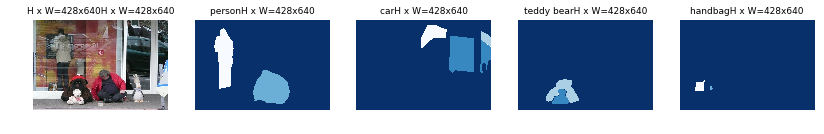

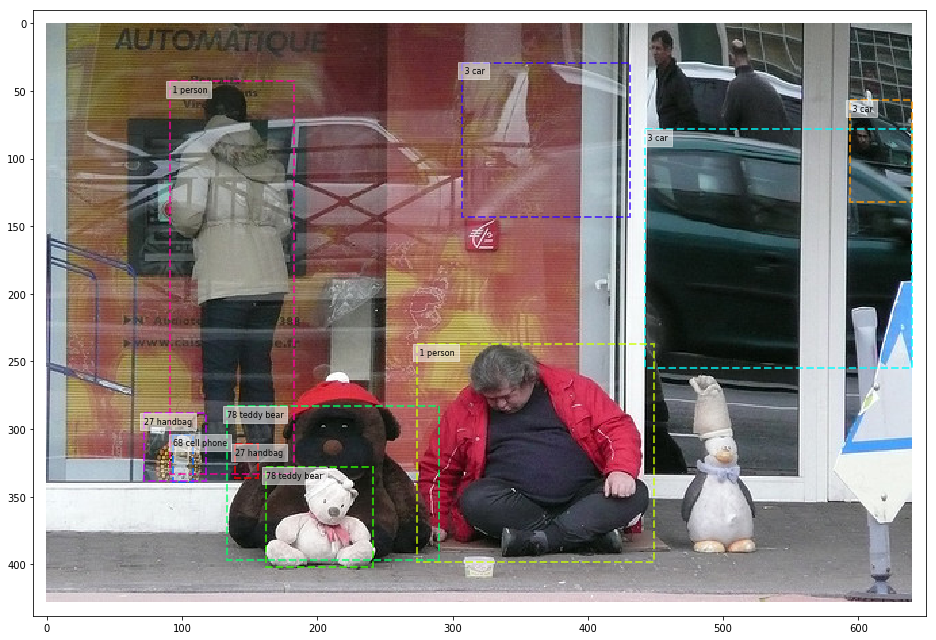

In [25]:
train_batch_x, _ =  data_gen_simulate(dataset_train, mrcnn_model.config, [3])
visualize.display_training_batch(dataset_train, train_batch_x)
# for i in train_batch_x_1:
#     print(i.shape)
# print(mrcnn_model.keras_model.input_names)
# imgmeta_idx = mrcnn_model.keras_model.input_names.index('input_image_meta')
# print(imgmeta_idx)
# img_meta    = train_batch_x_1[imgmeta_idx]
# print(img_meta)

# del train_batch_x_1    

## Call `train_in_batches()`

In [ ]:
fcn_model.config.display()

In [11]:
##----------------------------------------------------------------------------------------------
## Train the FCN only 
## Passing layers="heads" freezes all layers except the head
## layers. You can also pass a regular expression to select
## which layers to train by name pattern.
##----------------------------------------------------------------------------------------------            
train_layers = ['all']   # args.fcn_layers
loss_names   = ['fcn_MSE_loss']
# loss_names   = ['fcn_CE_loss']
fcn_model.epoch = fcn_model.config.LAST_EPOCH_RAN

fcn_model.train_in_batches(
            mrcnn_model,    
            dataset_train,
            dataset_val, 
            layers = train_layers,
            losses = loss_names,
            # learning_rate   = fcn_config.LEARNING_RATE,  
            # epochs          = 25,                             # total number of epochs to run (accross multiple trainings)
            # epochs_to_run   = fcn_config.EPOCHS_TO_RUN,
            # batch_size      = fcn_config.BATCH_SIZE,          # gets value from self.config.BATCH_SIZE
            # steps_per_epoch = fcn_config.STEPS_PER_EPOCH ,    # gets value form self.config.STEPS_PER_EPOCH
            # min_LR          = fcn_config.MIN_LR
            )


['all']
['.*']
layers regex : .*

Selecting layers to train
-------------------------
Layer    Layer Name               Layer Type
   0  input_pr_hm_norm       (InputLayer          )   ............................no weights to train ]
   1  block1_conv1           (Conv2D              )   TRAIN 
   2  block1_conv2           (Conv2D              )   TRAIN 
   3  block1_pool            (MaxPooling2D        )   ............................no weights to train ]
   4  block2_conv1           (Conv2D              )   TRAIN 
   5  block2_conv2           (Conv2D              )   TRAIN 
   6  block2_pool            (MaxPooling2D        )   ............................no weights to train ]
   7  block3_conv1           (Conv2D              )   TRAIN 
   8  block3_conv2           (Conv2D              )   TRAIN 
   9  block3_conv3           (Conv2D              )   TRAIN 
  10  block3_pool            (MaxPooling2D        )   ............................no weights to train ]
  11  block4_conv1        

D:\Program Files\Anaconda3\envs\TF\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


31/32 [============================>.] - ETA: 1:06 - loss: 1.4953e-04 - fcn_MSE_loss: 1.4953e-04
val_averages : [array([[0.0001]]), array([[0.0001]])]

32/32 [==============================] - 2621s 82s/step - loss: 1.4646e-04 - fcn_MSE_loss: 1.4646e-04 - val_loss: 1.3926e-04 - val_fcn_MSE_loss: 1.3926e-04

Epoch 00001: val_loss improved from inf to 0.00014, saving model to F:\models\train_fcn8_subset\fcn20181128T1142\fcn_0001.h5
Epoch 2/2
31/32 [============================>.] - ETA: 1:10 - loss: 1.3556e-04 - fcn_MSE_loss: 1.3556e-04
val_averages : [array([[0.0002]]), array([[0.0002]])]

32/32 [==============================] - 2767s 86s/step - loss: 1.3533e-04 - fcn_MSE_loss: 1.3533e-04 - val_loss: 1.5122e-04 - val_fcn_MSE_loss: 1.5122e-04

Epoch 00002: val_loss did not improve from 0.00014
Final : self.epoch 2   epochs 2
